In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import mylibrary.datasets as datasets
import mylibrary.splinelib as spline
import matplotlib
%matplotlib inline

In [2]:
default0 = plt.rcParams['figure.figsize']
default0

[6.0, 4.0]

(400, 2) (400, 1)


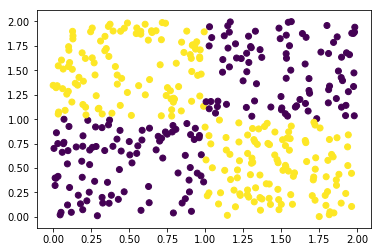

In [3]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[F]])

x = []
y = []
n_data = 400
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.uniform(low=0., high=1, size=xxx[0].size)
#     xx = xxx[index] + np.random.normal(loc=0., scale=0.21, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

In [4]:
colors = ['r', 'y', 'g', 'b']
h = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]

In [7]:
input_size = 2
hidden_1 = 2
output_size = 1
learning_rate = 0.001

optimizer = tnn.Adam(learning_rate)
layer1 = tnn.LinearLayer(input_size, hidden_1, optimizer=optimizer)
layer2 = spline.SplineVectorLayer(hidden_1, max_points=3)  # 2 -> Linear; 3 -> DoubleRelu
# layer2 = tnn.DoubleReluLayer(hidden_1, optimizer=optimizer)
# layer2 = tnn.LeakyRelu()
layer3 = tnn.NonLinearLayer(hidden_1, output_size, activation=tnn.Sigmoid(), optimizer=optimizer)

In [8]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(20000):
    a1 = layer1.forward(x)
    a2 = layer2.forward(a1)
    yout = layer3.forward(a2)
    
    loss = tnn.CrossEntropyBinary.loss(yout, y)
    dy = tnn.CrossEntropyBinary.del_loss(yout, y)
    
    da2 = layer3.backward(dy)
    da1 = layer2.backward(da2)
    dx = layer1.backward(da1)

    layer1.update()
    layer2.update()
    layer3.update()
    
    if step % 100 == 0:
        layer2._maintain_good_spline_()
        
        print('-------------------------')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()        
        a1 = layer1.forward(xxyy)
        a2 = layer2.forward(a1)
        classxy = layer3.forward(a2)
        classxyi = (classxy > 0.5).astype(int)
        plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   alpha=0.5,
                   aspect='auto', origin='lower')
        plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')            
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

-------------------------
epoch 0
Loss 0.7141707320818059

-------------------------
epoch 100
Loss 0.6769387188208147

-------------------------
epoch 200
Loss 0.6350628027408071

-------------------------
epoch 300
Loss 0.5758827011923711

-------------------------
epoch 400
Loss 0.5161272515337284

-------------------------
epoch 500
Loss 0.46388297715508303

-------------------------
epoch 600
Loss 0.42245118200146237

-------------------------
epoch 700
Loss 0.3892958560787902

-------------------------
epoch 800
Loss 0.3617677232095731

-------------------------
epoch 900
Loss 0.33578854880208

-------------------------
epoch 1000
Loss 0.3100755972738988

-------------------------
epoch 1100
Loss 0.28348396469890325

-------------------------
epoch 1200
Loss 0.25874139736442864

-------------------------
epoch 1300
Loss 0.23673585519843848

-------------------------
epoch 1400
Loss 0.2172334180285019

-------------------------
epoch 1500
Loss 0.20022361683542095

----------------


-------------------------
epoch 15300
Loss nan

-------------------------
epoch 15400
Loss nan

-------------------------
epoch 15500
Loss nan

-------------------------
epoch 15600
Loss nan

-------------------------
epoch 15700
Loss nan

-------------------------
epoch 15800
Loss nan

-------------------------
epoch 15900
Loss nan

-------------------------
epoch 16000
Loss nan

-------------------------
epoch 16100
Loss nan

-------------------------
epoch 16200
Loss nan

-------------------------
epoch 16300
Loss nan

-------------------------
epoch 16400
Loss nan

-------------------------
epoch 16500
Loss nan

-------------------------
epoch 16600
Loss nan

-------------------------
epoch 16700
Loss nan


TclError: invalid command name "pyimage34"

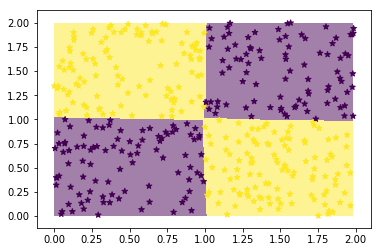

In [9]:
%matplotlib inline
a1 = layer1.forward(xxyy)
a2 = layer2.forward(a1)
classxy = layer3.forward(a2)
classxyi = (classxy > 0.5).astype(int)
plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           alpha=0.5,
           aspect='auto', origin='lower')
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')  

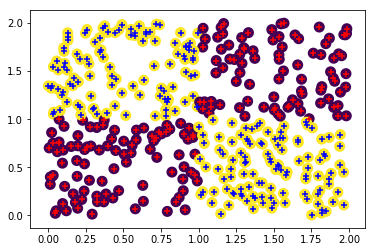

In [10]:
a1 = layer1.forward(x)
a2 = layer2.forward(a1)
yout = layer3.forward(a2)
out = (yout>0.5).astype(int)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

## Visualize neural network layers 

In [11]:
layer3.input.shape

(400, 2)

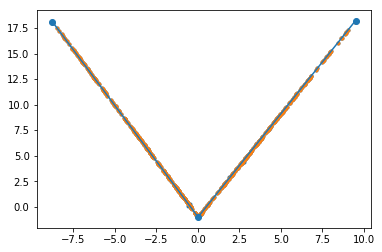

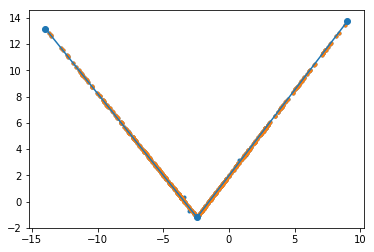

In [12]:
for i in range(layer3.input.shape[1]):
    a1 = layer2.input
    a2 = layer3.input
    da2 = layer2.del_output
    a2_ = a2 - da2
    plt.scatter(a1[:, i], a2_[:, i], marker='.')
    plt.scatter(a1[:, i], a2[:, i], marker='.')
    plt.plot(layer2.spline_list[i].X,  layer2.spline_list[i].Y, marker='o')
    da2[:,i].mean(), da2[:,i].var()
    plt.show()

In [13]:
da2.mean(axis=0)

array([ 3.59533393e-05, -5.18794127e-05])

In [14]:
da2.std(axis=0)

array([0.01751842, 0.02527846])

In [15]:
# layer2._increase_pieces_()

## Reverse Propagation

#### Reversing over sigmoid

In [16]:
pred = layer3.output > 0.5
pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [17]:
def logit(x, epsilon=1e-15):
    x = np.clip(x, epsilon, 1-epsilon)
    y = np.log(x/(1-x))
    return y

In [18]:
l3z_ = logit(layer3.output)# - layer3.del_output)
l3z_

array([[ 34.53957599],
       [ 16.80548716],
       [ 34.53957599],
       [ 34.53957599],
       [ -3.12969731],
       [ 34.53957599],
       [ 34.53957599],
       [ 31.90051866],
       [ 34.53957599],
       [-34.53877639],
       [ 34.53957599],
       [-34.53877639],
       [-32.20101165],
       [ 33.55874674],
       [  3.93433825],
       [ 34.43421548],
       [ 34.53957599],
       [-27.73478407],
       [-34.53877639],
       [-16.26832439],
       [-25.45385056],
       [ -9.07102152],
       [ 34.53957599],
       [-34.53877639],
       [ -4.35662981],
       [ -1.74726545],
       [ 34.53957599],
       [-34.53877639],
       [  3.9816721 ],
       [ 34.53957599],
       [ 34.53957599],
       [ 34.53957599],
       [  4.06701865],
       [ 28.22160938],
       [ 34.53957599],
       [ 13.19644712],
       [ 34.53957599],
       [ 34.53957599],
       [-34.53877639],
       [ 34.53957599],
       [-34.53877639],
       [-34.53877639],
       [ -3.37284607],
       [ 31

In [19]:
pred_ = tnn.Sigmoid().forward(l3z_) > 0.5
pred_

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [20]:
(pred != pred_).astype(int).sum()  # number of mistakes made
# pred - pred_

0

#### Reversing over layer 3

In [21]:
layer3.zee - layer3.bias

array([[ 8.18937429e+01],
       [ 2.06914296e+01],
       [ 1.18591765e+02],
       [ 6.11737621e+01],
       [ 7.56245175e-01],
       [ 1.28039873e+02],
       [ 1.27285853e+02],
       [ 3.57817197e+01],
       [ 9.20623889e+01],
       [-3.76571287e+01],
       [ 1.05052558e+02],
       [-5.03058255e+01],
       [-2.83150692e+01],
       [ 3.74109857e+01],
       [ 7.82028073e+00],
       [ 3.84022987e+01],
       [ 6.02859690e+01],
       [-2.38488416e+01],
       [-4.35845849e+01],
       [-1.23823819e+01],
       [-2.15679081e+01],
       [-5.18507904e+00],
       [ 8.01627527e+01],
       [-7.01154544e+01],
       [-4.70687322e-01],
       [ 2.13867704e+00],
       [ 1.20346980e+02],
       [-4.31400573e+01],
       [ 7.86761459e+00],
       [ 6.52294096e+01],
       [ 4.42717619e+01],
       [ 1.07222632e+02],
       [ 7.95296113e+00],
       [ 3.21073532e+01],
       [ 6.35042939e+01],
       [ 1.70823896e+01],
       [ 1.18147390e+02],
       [ 7.55096791e+01],
       [-3.7

In [22]:
l3wi = np.linalg.pinv(layer3.weights)
layer3.weights, l3wi

(array([[  7.6075354 ],
        [-10.97742468]]), array([[ 0.04264829, -0.06154008]]))

In [24]:
l2a_ = (layer3.zee - layer3.bias)@l3wi
l2a_

array([[ 3.49262793e+00, -5.03974784e+00],
       [ 8.82454051e-01, -1.27335232e+00],
       [ 5.05773575e+00, -7.29814721e+00],
       [ 2.60895623e+00, -3.76463847e+00],
       [ 3.22525620e-02, -4.65393918e-02],
       [ 5.46068137e+00, -7.87958456e+00],
       [ 5.42852372e+00, -7.83318212e+00],
       [ 1.52602909e+00, -2.20201004e+00],
       [ 3.92630327e+00, -5.66552716e+00],
       [-1.60601207e+00,  2.31742287e+00],
       [ 4.48031176e+00, -6.46494329e+00],
       [-2.14545733e+00,  3.09582474e+00],
       [-1.20758922e+00,  1.74251174e+00],
       [ 1.59551449e+00, -2.30227521e+00],
       [ 3.33521585e-01, -4.81260735e-01],
       [ 1.63779229e+00, -2.36328069e+00],
       [ 2.57109337e+00, -3.71000361e+00],
       [-1.01711226e+00,  1.46765972e+00],
       [-1.85880793e+00,  2.68219903e+00],
       [-5.28087389e-01,  7.62012825e-01],
       [-9.19834355e-01,  1.32729088e+00],
       [-2.21134744e-01,  3.19090201e-01],
       [ 3.41880416e+00, -4.93322255e+00],
       [-2.

In [25]:
layer2.output

array([[ 1.53114811e+01,  3.15091130e+00],
       [ 1.56712067e+00, -7.98867124e-01],
       [ 1.81177988e+01,  1.75269075e+00],
       [ 7.59365637e+00, -3.10159498e-01],
       [ 2.00604790e+00,  1.32133316e+00],
       [ 1.73160658e+01,  3.36391350e-01],
       [ 1.54814699e+01, -8.66325456e-01],
       [ 6.42848199e+00,  1.19547025e+00],
       [ 1.25020950e+01,  2.77637171e-01],
       [ 5.25077596e+00,  7.06928947e+00],
       [ 1.23894998e+01, -9.83746234e-01],
       [ 4.58119548e-01,  4.90014623e+00],
       [ 4.86223348e-01,  2.91635164e+00],
       [ 4.01953805e+00, -6.22387120e-01],
       [ 1.14311622e+01,  7.20958626e+00],
       [ 5.42048245e+00,  2.58185642e-01],
       [ 9.84254689e+00,  1.32923297e+00],
       [ 4.79899141e+00,  5.49831498e+00],
       [ 2.74225701e+00,  5.87081251e+00],
       [-6.03400847e-01,  7.09819363e-01],
       [ 1.04961155e+00,  2.69214921e+00],
       [-7.60585621e-01, -5.47581072e-02],
       [ 1.09907996e+01,  3.14294528e-01],
       [ 1.

In [26]:
pred1_ = tnn.Sigmoid().forward(l2a_@layer3.weights + layer3.bias) > 0.5
(pred != pred1_).astype(int).sum()

0

In [27]:
pred1_ = tnn.Sigmoid().forward(layer2.output@layer3.weights + layer3.bias) > 0.5
(pred != pred1_).astype(int).sum()

0

#### Reversing over layer 2

In [28]:
(np.abs(layer2.output - l2a_)).mean()  ## here is the most loss in information backward

5.3520135994701965

In [29]:
layer2.output - l2a_

array([[11.81885314,  8.19065913],
       [ 0.68466662,  0.4744852 ],
       [13.06006305,  9.05083796],
       [ 4.98470014,  3.45447898],
       [ 1.97379534,  1.36787255],
       [11.85538442,  8.21597591],
       [10.05294622,  6.96685666],
       [ 4.90245291,  3.3974803 ],
       [ 8.57579169,  5.94316434],
       [ 6.85678803,  4.7518666 ],
       [ 7.90918801,  5.48119705],
       [ 2.60357688,  1.80432149],
       [ 1.69381257,  1.1738399 ],
       [ 2.42402356,  1.67988809],
       [11.09764058,  7.69084699],
       [ 3.78269015,  2.62146634],
       [ 7.27145352,  5.03923658],
       [ 5.81610367,  4.03065527],
       [ 4.60106494,  3.18861349],
       [-0.07531346, -0.05219346],
       [ 1.96944591,  1.36485833],
       [-0.53945088, -0.37384831],
       [ 7.57199546,  5.24751708],
       [ 4.14692169,  2.87388477],
       [ 0.20327301,  0.14087153],
       [ 4.46777765,  3.09624321],
       [ 9.70264712,  6.72409364],
       [ 7.75530379,  5.37455276],
       [ 1.49904712,

In [30]:
def reverse_spline(self:spline.Spline1D, y, whichPiece = None):
    xinp = np.zeros_like(self.input)
    for i in range(self.n_points-1):
        xpossible = self.diffX[i]/self.diffY[i] *(y - self.Y[i]) + self.X[i]
#         print(xpossible)
#         print()
        xinp += xpossible*self.rangeX[i]
    return xinp
sp0x_ = reverse_spline(layer2.spline_list[0], l2a_[:,0])
sp1x_ = reverse_spline(layer2.spline_list[1], l2a_[:,1])

In [31]:
sp0x = layer2.spline_list[0].input
sp1x = layer2.spline_list[1].input

In [32]:
sp0x - sp0x_

array([-5.42074536, -0.31402399,  6.43570215, -2.28624468,  0.97264147,
        5.84206391, -4.61080791,  2.41581733, -3.93330744, -3.14488229,
        3.89746804, -1.19413679, -0.7768712 , -1.11178422, -5.08995949,
        1.86402371, -3.33506961,  2.86604366, -2.11028948,  0.0345427 ,
       -0.90329109, -0.26582913,  3.73130721, -1.90199559,  0.10016832,
        2.20161925, -4.45014239,  3.82163739, -0.68754156, -3.40031882,
       -5.30001747, -4.32248822, -1.09114472,  1.06267005,  5.69195107,
       -3.60773081,  5.42198713,  3.72620249,  3.21111933,  4.1262931 ,
       -3.55377647,  2.55049282, -4.78893589,  1.72945839, -2.82821184,
        3.08711267, -0.78280387,  4.03265009,  2.50657316,  3.97897887,
        3.19569007, -3.7862877 , -0.96818818,  3.26225394, -4.21835498,
        1.94606495, -4.21102005,  1.67597674,  3.41167891,  2.74929624,
        6.01839565, -2.08497126, -4.66353319,  3.34062958,  2.85336935,
        1.50117491,  0.81010671,  2.02250718, -5.63254739, -2.01

In [121]:
## reverse spline test
t0 = reverse_spline(layer2.spline_list[0], layer2.spline_list[0].output)
t1 = layer2.spline_list[0].input
np.abs(t0-t1).mean()  # works fine for reversing the spline

2.225303274983048e-16

In [78]:
# sp1x - sp1x_

In [87]:
import copy
l2 = copy.deepcopy(layer2)
sp0y_ = l2.spline_list[0].forward(sp0x_)
sp1y_ = l2.spline_list[1].forward(sp1x_)
# l2s0 = copy.deepcopy(layer2.spline_list[0])
# l2s1 = copy.deepcopy(layer2.spline_list[1])
# sp0y_ = l2s0.forward(sp0x_)
# sp1y_ = l2s1.forward(sp1x_)

In [88]:
layer2 is l2

False

In [122]:
np.abs(l2a_[:,0] - sp0y_).mean()   ### the inverse of the spline is doing very poorly due to previous error

1.091327292848487

In [94]:
layer2.spline_list[0].output - sp0y_

array([11.81885314,  0.68466662, 13.06006305,  4.98470014,  1.97379534,
       11.85538442, 10.05294622,  4.90245291,  8.57579169,  5.704763  ,
        7.90918801,  0.41001795,  1.31104242,  2.42402356, 11.09764058,
        3.78269015,  7.27145352,  5.79998036,  2.96095432, -0.07531346,
        1.96944591, -0.53945088,  7.57199546,  0.32217495,  0.20327301,
        4.46777765,  9.70264712,  6.03249214,  1.49904712,  7.41371641,
       11.55563007,  9.42432269,  2.37902324,  2.15649163, 11.55075828,
        7.86593685, 11.00291656,  7.56163637,  5.31578011,  8.37354602,
        1.70051955,  0.89914159, 10.44131873,  3.50961482,  6.16635134,
        5.14238776,  1.70674757,  8.1835149 ,  5.08662501, -0.02373315,
        6.48505989,  8.25524451,  2.11094106,  6.62013889,  4.21576582,
        3.94917763,  9.1812886 , -3.00742488,  6.92336915,  5.57918645,
       12.21321697,  4.54586361,  9.27513822, -0.17722444,  5.79038351,
        2.55862343,  1.64396122,  1.60003745, 12.28064519,  4.40

In [95]:
l1a = layer2.input
l1a_ = np.c_[sp0x_, sp1x_]

In [96]:
np.abs(l1a_ - l1a).mean() ## very high error here as well from previous error accumulation

3.2191991361913845

In [97]:
pred1_ = tnn.Sigmoid().forward(l2.forward(l1a_)@layer3.weights + layer3.bias) > 0.5
(pred != pred1_).astype(int).sum()

83

#### Reversing over layer 1

In [98]:
l1wi = np.linalg.pinv(layer1.weights)
layer1.weights, l1wi

(array([[ 5.77630515, -6.96305798],
        [-4.20030525, -4.91189565]]), array([[ 0.08524699, -0.12084535],
        [-0.07289719, -0.100249  ]]))

In [102]:
xx_ = (l1a_ - layer1.bias)@l1wi
xx_

array([[1.02853711, 1.55423023],
       [0.91085419, 1.10737342],
       [0.88710921, 0.15635899],
       [0.69755796, 1.00257157],
       [0.96923601, 0.8588873 ],
       [0.87000985, 0.08557044],
       [0.3492218 , 0.83141865],
       [1.15245849, 0.93560787],
       [0.53480973, 0.92260619],
       [0.81668504, 0.7061429 ],
       [0.91161271, 0.2577995 ],
       [1.28492965, 1.2911732 ],
       [0.83323979, 0.77241495],
       [0.82276099, 1.06408934],
       [0.89727403, 1.02875715],
       [1.03223755, 0.75716674],
       [0.70223562, 1.00486992],
       [1.14490078, 1.22357423],
       [0.8061812 , 0.66409385],
       [1.08511587, 1.19299588],
       [0.84519621, 0.82027895],
       [0.93815623, 0.8458733 ],
       [0.95665872, 0.4442827 ],
       [0.75916674, 0.47588531],
       [0.96281778, 0.8561998 ],
       [0.97646768, 0.86191541],
       [1.0966788 , 1.82701538],
       [1.17981437, 1.36811082],
       [0.8973579 , 1.02909293],
       [0.99900681, 1.43601436],
       [0.

In [123]:
np.abs((xx_@layer1.weights + layer1.bias) - l1a_).mean()  # almost equal

1.524546548031802e-15

In [107]:
pred1_ = tnn.Sigmoid().forward(l2.forward(xx_@layer1.weights + layer1.bias)@layer3.weights + layer3.bias) > 0.5
(pred != pred1_).astype(int).sum()

83

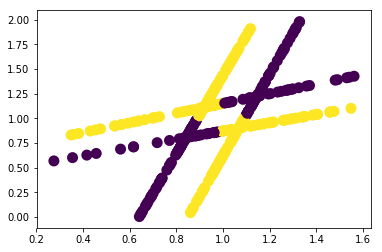

In [115]:
plt.scatter(xx_[:,0], xx_[:, 1], c=y.reshape(-1), lw=5)

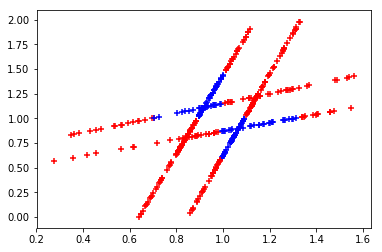

In [117]:
out = (pred1_).astype(int)
plt.scatter(xx_[:,0], xx_[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))